In [29]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
# %matplotlib具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在你的python console里面生成图像
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8
# rcParams主要作用是设置画的图的分辨率，大小等信息

In [19]:
dataset = pd.read_csv('/Users/hkmac/Desktop/Electric_Production.csv')

In [20]:
indexedDataset = dataset.set_index(['DATE']) 
#set date as index variable

In [21]:
indexedDataset.head(5)

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


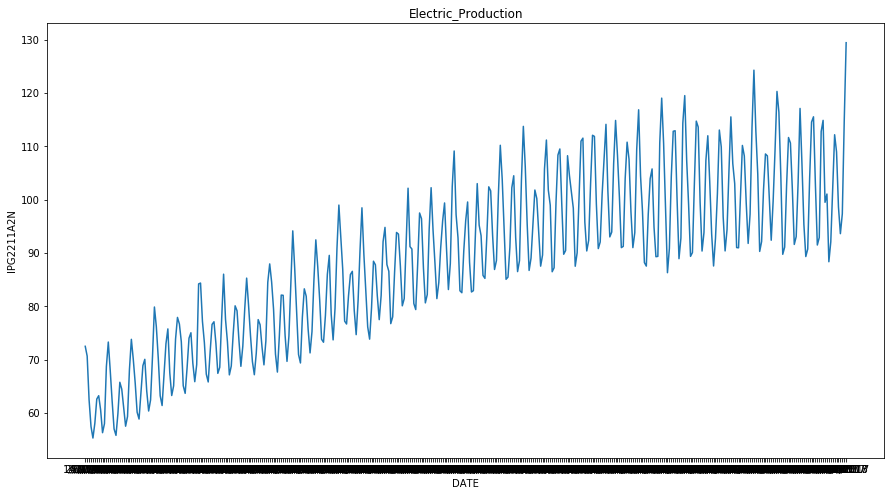

In [30]:
plt.xlabel('DATE')
plt.ylabel('IPG2211A2N')
plt.title('Electric_Production')
plt.plot(indexedDataset)

In [33]:
#Rolling statistics
rolmean = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window = 12).std()
print(rolmean, rolstd)
# 选择window = 12 意味着前11个数的对应值为NaN，然后把12个数的mean放到第12个数的位置

           IPG2211A2N
DATE                 
1/1/1985          NaN
2/1/1985          NaN
3/1/1985          NaN
4/1/1985          NaN
5/1/1985          NaN
6/1/1985          NaN
7/1/1985          NaN
8/1/1985          NaN
9/1/1985          NaN
10/1/1985         NaN
11/1/1985         NaN
12/1/1985   62.165667
1/1/1986    62.232375
2/1/1986    62.008617
3/1/1986    61.989608
4/1/1986    61.953067
5/1/1986    61.994617
6/1/1986    62.145458
7/1/1986    62.407567
8/1/1986    62.510325
9/1/1986    62.544983
10/1/1986   62.646383
11/1/1986   62.758150
12/1/1986   62.709892
1/1/1987    62.752350
2/1/1987    62.925275
3/1/1987    63.207600
4/1/1987    63.468075
5/1/1987    63.723050
6/1/1987    64.055658
...               ...
8/1/2015   104.057283
9/1/2015   104.182550
10/1/2015  104.116900
11/1/2015  103.563525
12/1/2015  103.052908
1/1/2016   102.787417
2/1/2016   101.978250
3/1/2016   101.218600
4/1/2016   101.183542
5/1/2016   101.153867
6/1/2016   101.269533
7/1/2016   101.511558
8/1/2016  

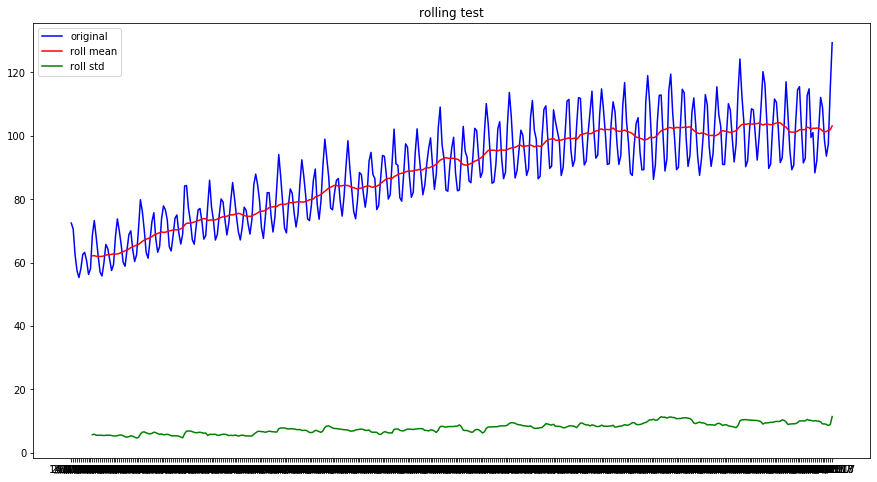

In [34]:
#plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = 'original')
mean = plt.plot(rolmean, color = 'red', label = 'roll mean')
std = plt.plot(rolstd, color = 'green', label = 'roll std')
plt.legend(loc = 'best')
plt.title('rolling test')
plt.show(block = False)

In [35]:
# dickey-fuller test
from statsmodels.tsa.stattools import adfuller
#addfuller是一个function
print('result of dickey-fuller test:')
dftest = adfuller(indexedDataset['IPG2211A2N'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index =['TestStatistic', 'p-value', '#lags used', 'Number of observations used '])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
# print the value in a loop
print(dfoutput)
# p-value 如果p > 0.05, 不能否定原假设    critical value < test statistic，不能拒绝原假设
#显著性水平α 如果α > P值，则在显著性水平α下拒绝原假设
# This data is not stationary

result of dickey-fuller test:
TestStatistic                    -2.256990
p-value                           0.186215
#lags used                       15.000000
Number of observations used     381.000000
Critical Value (1%)              -3.447631
Critical Value (5%)              -2.869156
Critical Value (10%)             -2.570827
dtype: float64


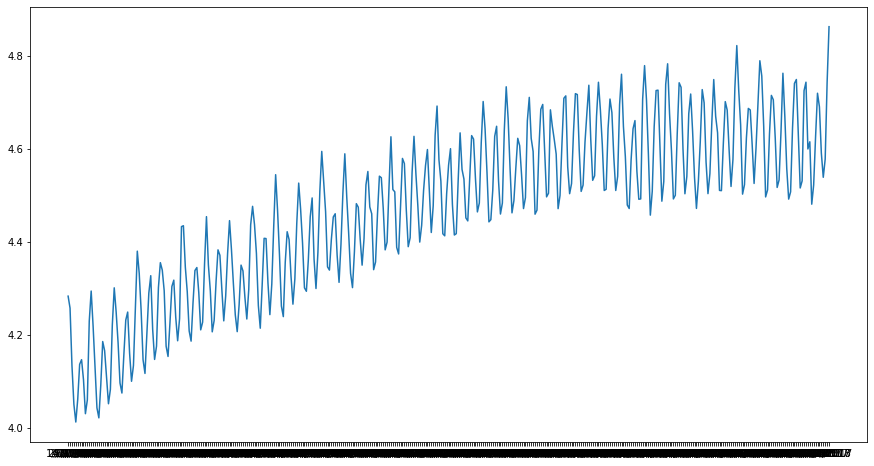

In [36]:
#Estimating the trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

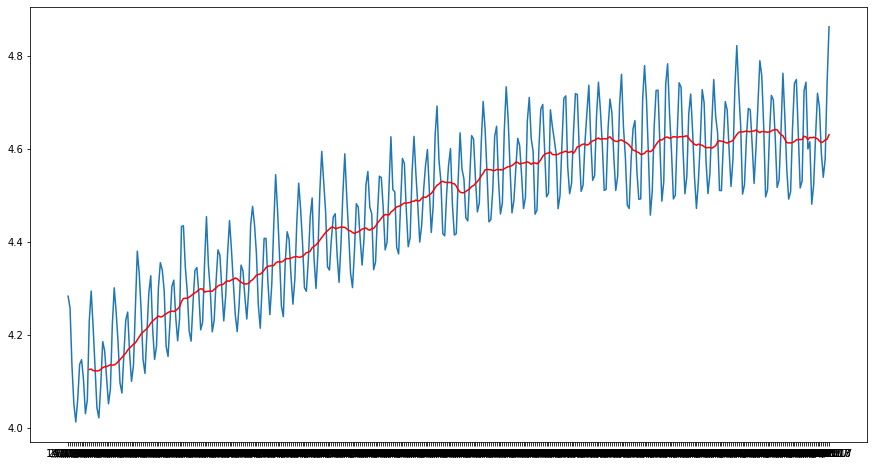

In [38]:
movingAverage = indexedDataset_logScale.rolling(window = 12).mean()
movingStd = indexedDataset_logScale.rolling(window = 12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')
# The mean of log(dataset) is not stationary with a upward trend


In [40]:
DatasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
DatasetLogScaleMinusMovingAverage.head(12)
# Remove NA values
DatasetLogScaleMinusMovingAverage.dropna(inplace = True)
DatasetLogScaleMinusMovingAverage.head(10)

,IPG2211A2N
DATE,
12/1/1985,0.103961
1/1/1986,0.167724
2/1/1986,0.095629
3/1/1986,0.007329
4/1/1986,-0.079115
5/1/1986,-0.101472
6/1/1986,-0.033363
7/1/1986,0.055963
8/1/1986,0.034639


In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity (timeseries):
    # Determing rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingStd = timeseries.rolling(window = 12).std()
    # Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'original')
    mean = plt.plot(movingAverage, color = 'red', label = 'roll mean')
    std = plt.plot(movingStd, color = 'green', label = 'roll std')
    plt.legend(loc = 'best')
    plt.title('rolling mean & standard deviation')
    plt.show(block = False)
    # Perform Dickey-Fuller test
    print('result of dickey-fuller test:')
    dftest = adfuller(timeseries['IPG2211A2N'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index =['TestStatistic', 'p-value', '#lags used', 'Number of observations used '])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)


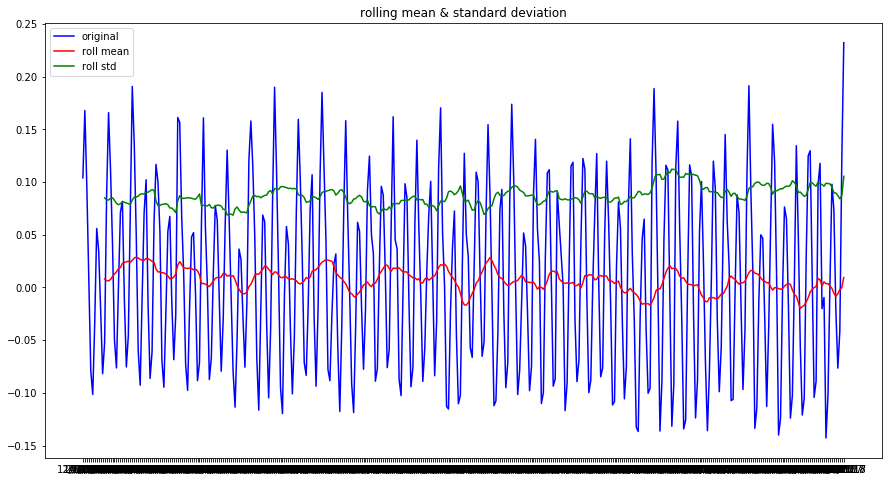

result of dickey-fuller test:
TestStatistic                    -5.211586
p-value                           0.000008
#lags used                       15.000000
Number of observations used     370.000000
Critical Value (1%)              -3.448148
Critical Value (5%)              -2.869383
Critical Value (10%)             -2.570948
dtype: float64


In [45]:
test_stationarity(DatasetLogScaleMinusMovingAverage)
# P < 0.05, Critical Value > TestStatistic
# reject the null hypothesis, stationary

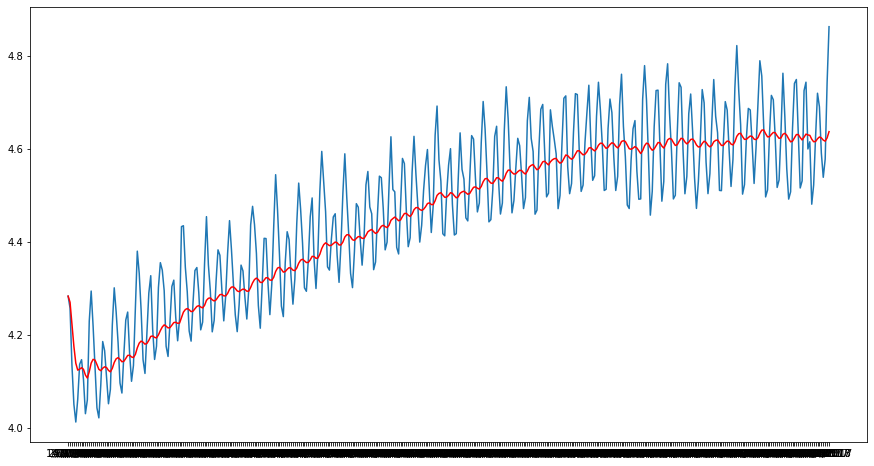

In [46]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')


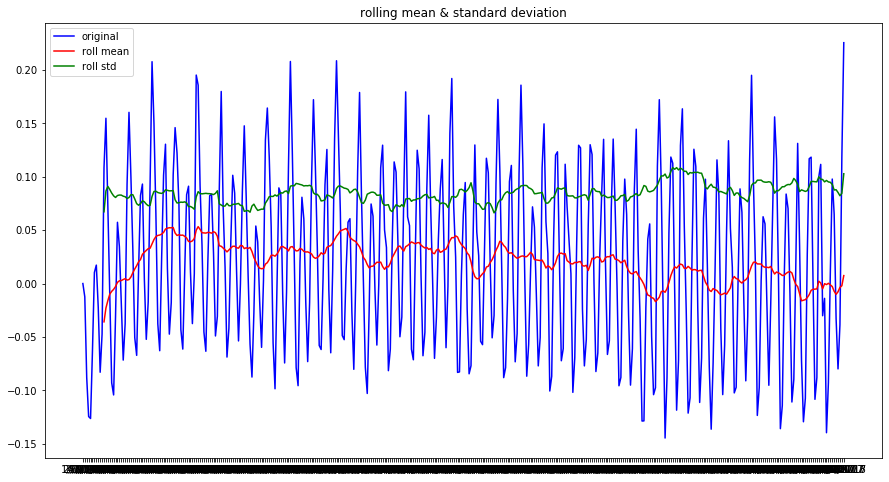

result of dickey-fuller test:
TestStatistic                    -3.251531
p-value                           0.017189
#lags used                       15.000000
Number of observations used     381.000000
Critical Value (1%)              -3.447631
Critical Value (5%)              -2.869156
Critical Value (10%)             -2.570827
dtype: float64


In [47]:
DatasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(DatasetLogScaleMinusMovingExponentialDecayAverage)


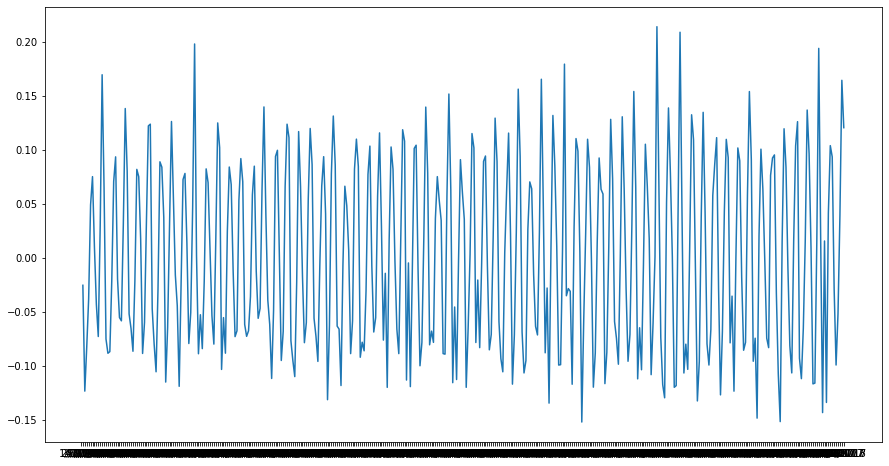

In [48]:
# now the dataset is stationary, shift the date into time series analysis
DatasetlogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(DatasetlogDiffShifting)
# shift the value by 1 

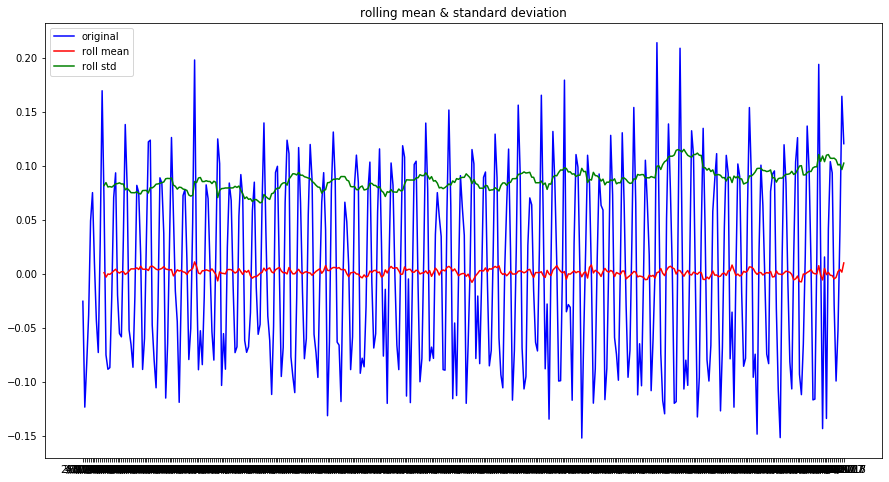

result of dickey-fuller test:
TestStatistic                  -6.748333e+00
p-value                         2.995161e-09
#lags used                      1.400000e+01
Number of observations used     3.810000e+02
Critical Value (1%)            -3.447631e+00
Critical Value (5%)            -2.869156e+00
Critical Value (10%)           -2.570827e+00
dtype: float64


In [50]:
DatasetlogDiffShifting.dropna(inplace = True)
test_stationarity(DatasetlogDiffShifting)